<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bibliotecas" data-toc-modified-id="Bibliotecas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bibliotecas</a></span></li><li><span><a href="#Cenário-Econômico" data-toc-modified-id="Cenário-Econômico-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cenário Econômico</a></span></li><li><span><a href="#Valor-adicionado-por-setor" data-toc-modified-id="Valor-adicionado-por-setor-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Valor adicionado por setor</a></span></li><li><span><a href="#Agropecuária-em-Valores" data-toc-modified-id="Agropecuária-em-Valores-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Agropecuária em Valores</a></span></li><li><span><a href="#Mensurando-toda-a-cadeia-do-Agronegócios" data-toc-modified-id="Mensurando-toda-a-cadeia-do-Agronegócios-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Mensurando toda a cadeia do Agronegócios</a></span></li><li><span><a href="#Produtividade-Agropecuária" data-toc-modified-id="Produtividade-Agropecuária-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Produtividade Agropecuária</a></span></li></ul></div>

## Bibliotecas

In [167]:
import pandas as pd

**Séries do Banco Central do Brasil**

In [2]:
import sgs

**Pacotes de visualização**

In [1]:
import seaborn as sns
import cufflinks as cf
import plotly.express as px
import itertools
from itertools import product
from plotly.offline import iplot
import plotly.graph_objs as go
from scipy import stats
import plotly.offline as py
import plotly.offline as py
import plotly.graph_objs as go
import plotly

plotly.offline.init_notebook_mode(connected=True)
cf.go_offline()

**Geo**

In [161]:
import geopandas as gpd
from libpysal.weights.contiguity import Queen
import libpysal
from libpysal import examples
import pygeoda
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline
from splot.libpysal import plot_spatial_weights

## Cenário Econômico

- Foram utilizadas 

In [66]:
series = [7326]
labels = ['PIB_variação_real_ano']
data_inicial ='31-12-1962'
data_final = '31-12-2020'
PIB_variação= sgs.dataframe(series, start= data_inicial, end=data_final)
PIB_variação= PIB_variação.rename(columns={s:l for s, l in zip(series, labels)})

In [150]:
cores = []
for x in PIB_variação['PIB_variação_real_ano']:
    if x < 0:
        cores.append('red')
    else:
        cores.append('blue')

In [151]:
data = [go.Bar(x=PIB_variação.index,
               y=PIB_variação['PIB_variação_real_ano'],
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.9
              )
       ]
configuracoes_layout = go.Layout(title='Variação real anual do PIB',
                                 yaxis={'title':'Variação percentual'},
                                 xaxis={'title':'Período'})
fig = go.Figure(data=data, layout=configuracoes_layout)
py.iplot(fig)

In [103]:
series = [4380]
labels = ['PIB_valores']
data_inicial ='31-12-1990'
data_final = '31-12-2020'
PIB_valores = sgs.dataframe(series, start= data_inicial, end=data_final)
PIB_valores = PIB_valores.rename(columns={s:l for s, l in zip(series, labels)})

In [104]:
PIB_valores['PIB_valores']=PIB_valores['PIB_valores']/100000

In [132]:
PIB_valores.iplot(kind='bar', color='Darkblue', title='PIB Mensal em valores correntes em trilhões de reais')

In [135]:
series = [7327,7329,7328]
labels = ['PIB_agro','PIB_serviços','PIB_indústria']
data_inicial ='01-01-2015'
data_final = '31-12-2020'
PIB_setor = sgs.dataframe(series, start= data_inicial, end=data_final)
PIB_setor= PIB_setor.rename(columns={s:l for s, l in zip(series, labels)})

In [136]:
PIB_setor.head()

PIB_agro  PIB_serviços  PIB_indústria
2015-01-01      3.31         -2.73          -5.76
2016-01-01     -5.22         -2.22          -4.57
2017-01-01     14.15          0.77          -0.50
2018-01-01      1.31          2.09           0.72
2019-01-01      0.63          1.66           0.37

In [148]:
cores = []
for x in PIB_setor['PIB_agro']:
    if x < 0:
        cores.append('red')
    else:
        cores.append('blue')

In [149]:
data = [go.Bar(x=PIB_setor.index,
               y=PIB_setor['PIB_agro'],
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.9
              )
       ]
configuracoes_layout = go.Layout(title='Variação anual do PIB da Agropecuária',
                                 yaxis={'title':'Variação percentual'},
                                 xaxis={'title':'Período'})
fig = go.Figure(data=data, layout=configuracoes_layout)
py.iplot(fig)

In [140]:
cores = []
for x in PIB_setor['PIB_serviços']:
    if x < 0:
        cores.append('red')
    else:
        cores.append('blue')

In [142]:
data = [go.Bar(x=PIB_setor.index,
               y=PIB_setor['PIB_serviços'],
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.9
              )
       ]
configuracoes_layout = go.Layout(title='Variação anual do PIB da Serviços',
                                 yaxis={'title':'Variação percentual'},
                                 xaxis={'title':'Período'})
fig = go.Figure(data=data, layout=configuracoes_layout)
py.iplot(fig)

In [143]:
cores = []
for x in PIB_setor['PIB_indústria']:
    if x < 0:
        cores.append('red')
    else:
        cores.append('blue')

In [147]:
data = [go.Bar(x=PIB_setor.index,
               y=PIB_setor['PIB_indústria'],
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.9
              )
       ]
configuracoes_layout = go.Layout(title='Variação anual do PIB da Indústria',
                                 yaxis={'title':'Variação percentual'},
                                 xaxis={'title':'Período'})
fig = go.Figure(data=data, layout=configuracoes_layout)
py.iplot(fig)

## Valor adicionado por setor

In [112]:
series_VA = [22105,22106,22107,22110]
labels_VA = ['PIB_Agropecuária','PIB_Indústria','PIB_serviços','Consumo_das_famílias']
data_inicial ='01-01-1996'
data_final = '01-01-2021'
Valor_adicionado_por_setor = sgs.dataframe(series_VA, start= data_inicial, end=data_final)
Valor_adicionado_por_setor = Valor_adicionado_por_setor.rename(columns={s:l for s, l in zip(series_VA, labels_VA)})

In [113]:
Valor_adicionado_por_setor.head()

PIB_Agropecuária  PIB_Indústria  PIB_serviços  \
1996-01-01             95.12         100.69        100.80   
1996-04-01             96.59          97.05        102.31   
1996-07-01            101.69         105.99        103.69   
1996-10-01            126.16          99.54        101.56   
1997-01-01            101.74         104.25        103.86   

            Consumo_das_famílias  
1996-01-01                 98.86  
1996-04-01                100.93  
1996-07-01                103.70  
1996-10-01                109.13  
1997-01-01                106.65

In [154]:
Valor_adicionado_por_setor.iplot(title= 'PIB Trimestral por Setor- Dados dessazonalizados')

In [159]:
shape=gpd.read_file('C:/Users/agend/Desktop/Estudo_virtual/mun_agro.shp')
shape.head(2)

OBJECTID              MUNICIPIO  Shape_Leng  Shape_Area     V1       V2  \
0         1      Lupionópolis - PR    0.514701    0.010596  173.0  59.7001   
1         2  Águas de Lindóia - SP    0.344094    0.004856   69.0  28.4016   

        V3        V4        V5       V6  ...        GEO      V32      V33  \
0  3.23121  165.7380  852.3680  124.304  ...  4113809.0  2.45788  1.15607   
1  3.42029   36.3902   80.0584  133.431  ...  3500501.0  2.18536  5.79710   

       V34      V35       V36      V37      V38      V39  \
0  48.5549  8.58624   8.09249  68.7861  71.0983  36.9942   
1  39.1304  2.43528  13.04350  49.2754  60.8696  46.3768   

                                            geometry  
0  POLYGON Z ((-51.63021 -22.66372 0.00000, -51.6...  
1  POLYGON Z ((-46.61019 -22.43936 0.00000, -46.6...  

[2 rows x 45 columns]

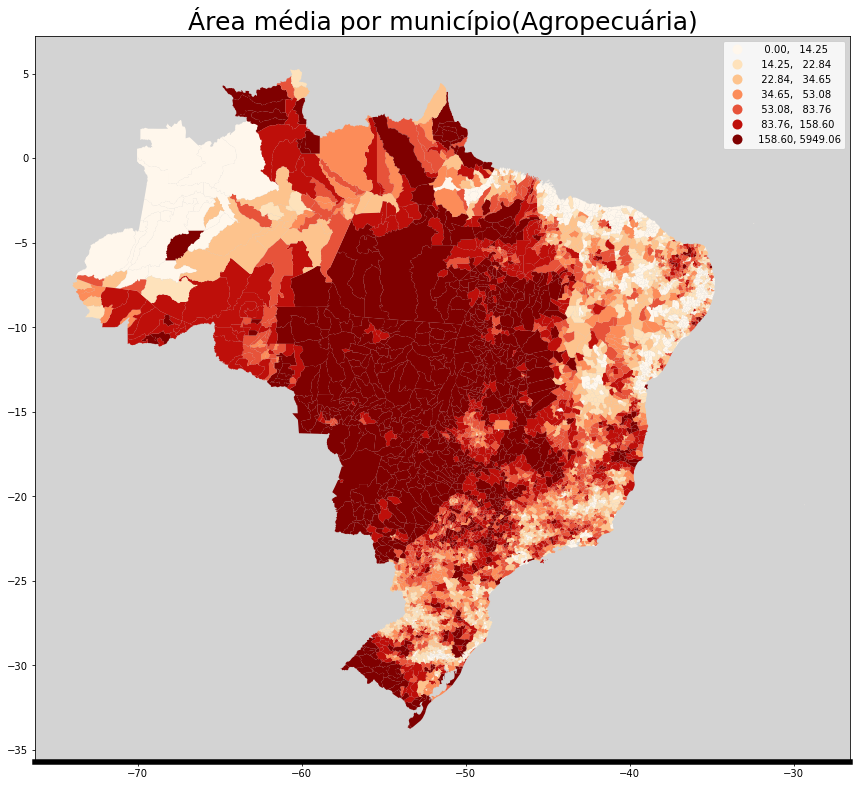

In [165]:
fig, ax = plt.subplots(figsize=(12,12), subplot_kw={'aspect':'equal'})
shape.plot(column='V2', scheme='Quantiles', k=7,cmap='OrRd',legend=True, ax=ax),ax.set_title("Área média por município(Agropecuária)", fontdict={'fontsize':25}),ax.set_xlabel(' ', fontdict={'fontsize':20}),ax.set_facecolor('lightgrey'),ax.spines['bottom'].set_linewidth(5.5)
fig.tight_layout()

In [170]:
regioes=pd.read_csv("C:/Users/agend/Desktop/Estudo Agro/bases/regioes_agro.csv", sep = ";", encoding='latin-1')
mapa=pd.merge(shape,regioes,on=['OBJECTID'],how='left')
mapa.head()

OBJECTID            MUNICIPIO_x  Shape_Leng  Shape_Area      V1        V2  \
0         1      Lupionópolis - PR    0.514701    0.010596   173.0   59.7001   
1         2  Águas de Lindóia - SP    0.344094    0.004856    69.0   28.4016   
2         3            Uruará - PA    5.505977    0.882292  3993.0  137.3820   
3         4      São Leopoldo - RS    0.505968    0.009694    65.0   26.7850   
4         5            Vargem - SP    0.535624    0.012407   228.0   31.9352   

        V3         V4         V5        V6  ...       V34       V35       V36  \
0  3.23121   165.7380   852.3680  124.3040  ...  48.55490  8.586240   8.09249   
1  3.42029    36.3902    80.0584  133.4310  ...  39.13040  2.435280  13.04350   
2  3.05109  1556.9600  4003.6200  800.7230  ...  30.12770  3.377250   2.17881   
3  3.44615    85.3800    85.3800   18.9733  ...   9.23077  0.754856  20.00000   
4  3.11404    52.0186   127.1570   54.4957  ...  12.71930  2.231690  14.03510   

        V37      V38      V39  \
0  68.78610  71.0983  36.9942   
1  49.27540  60.8696  46.3768   
2   5.76008  84.0471  64.1122   
3  26.15380  53.8462  40.0000   
4  55.26320  54.8246  51.7544   

                                            geometry        MUNICIPIO_y  \
0  POLYGON Z ((-51.63021 -22.66372 0.00000, -51.6...      Lupionópolis    
1  POLYGON Z ((-46.61019 -22.43936 0.00000, -46.6...  Águas de Lindóia    
2  POLYGON Z ((-53.85954 -2.88750 0.00000, -53.85...            Uruará    
3  POLYGON Z ((-51.17861 -29.69309 0.00000, -51.1...      São Leopoldo    
4  POLYGON Z ((-46.39678 -22.81069 0.00000, -46.3...            Vargem    

   Estado   Região  
0      PR      Sul  
1      SP  Sudeste  
2      PA    Norte  
3      RS      Sul  
4      SP  Sudeste  

[5 rows x 48 columns]

In [173]:
fig = px.box(mapa, x=mapa['Estado'], y=mapa['V2'], color=mapa['Região'],title="Área Média(ha) por município")
fig.show()

## Agropecuária em Valores

## Mensurando toda a cadeia do Agronegócios

## Produtividade Agropecuária